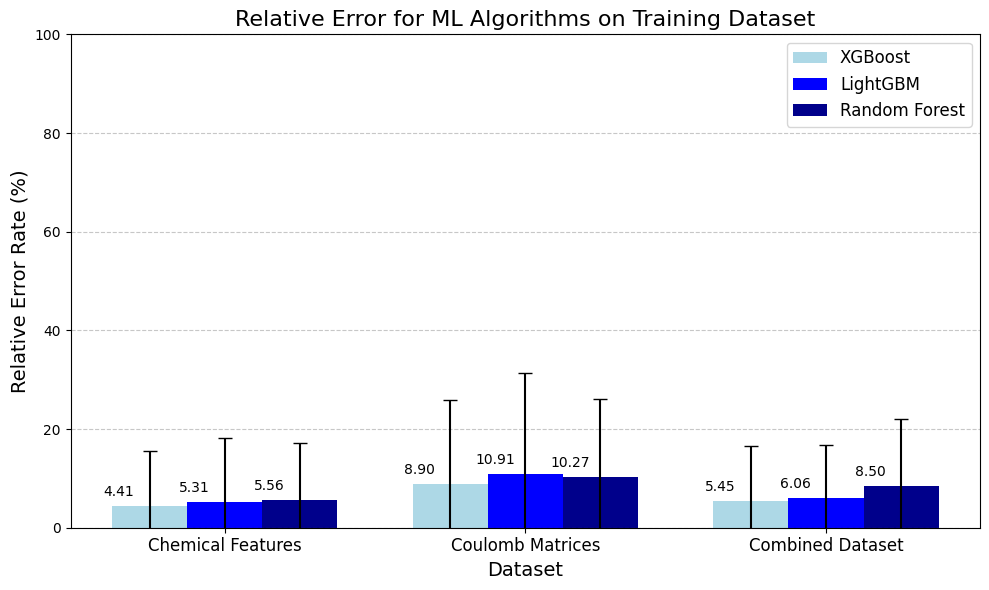

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

categories = ['Chemical Features', 'Coulomb Matrices', 'Combined Dataset']
algorithms = ['XGBoost', 'LightGBM', 'Random Forest']
data = {
    'XGBoost': [4.41, 8.9, 5.45],
    'LightGBM': [5.31, 10.91, 6.06],
    'Random Forest': [5.557, 10.27, 8.5]
}
errors = {
    'XGBoost': [11.18, 17.02, 11.14],
    'LightGBM': [12.87, 20.48, 10.79],
    'Random Forest': [11.66, 15.82, 13.47]
}

x = np.arange(len(categories))  
width = 0.25  

fig, ax = plt.subplots(figsize=(10, 6))

rects1 = ax.bar(x - width, data['XGBoost'], width, yerr=errors['XGBoost'], label='XGBoost', capsize=5, color='lightblue')
rects2 = ax.bar(x, data['LightGBM'], width, yerr=errors['LightGBM'], label='LightGBM', capsize=5, color='blue')
rects3 = ax.bar(x + width, data['Random Forest'], width, yerr=errors['Random Forest'], label='Random Forest', capsize=5, color='darkblue')

ax.set_ylabel('Relative Error Rate (%)', fontsize=14)
ax.set_xlabel('Dataset', fontsize=14)
ax.set_title('Relative Error for ML Algorithms on Training Dataset', fontsize=16)
ax.set_ylim(0, 100)
ax.set_xticks(x)
ax.set_xticklabels(categories, fontsize=12)
ax.legend(fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.7)

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() -0.48/ 2, height),
                    xytext=(3, 5),  # Ajustar el desplazamiento de las etiquetas
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10, color='black')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
fig.tight_layout() 

plt.show()

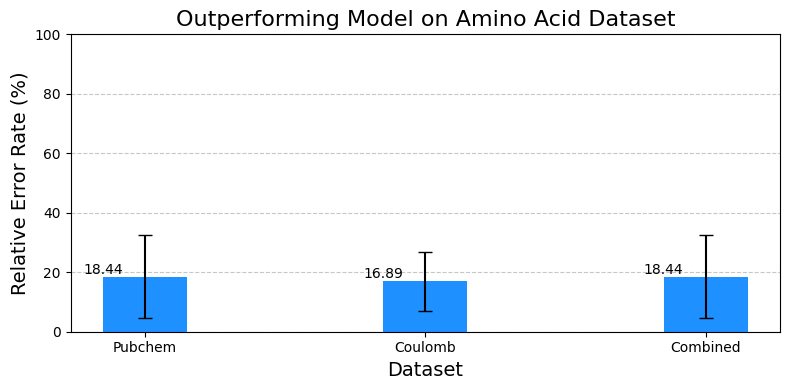

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = {
    'Energy Type': ['Ground State Energy', 'Ground State Energy', 'Ground State Energy'],
    'Dataset': ['Pubchem', 'Coulomb', 'Combined'],
    'Relative Error %': [18.44, 16.89, 18.44],
    'Std Dev': [13.93, 9.89, 13.93]
}

df = pd.DataFrame(data)


colors = {'Ground State Energy': 'dodgerblue'}

fig, ax = plt.subplots(figsize=(8, 4))

for i, energy_type in enumerate(df['Energy Type'].unique()):
    subset = df[df['Energy Type'] == energy_type]
    bar_positions = np.arange(len(subset)) + i * 0.35  
    bars = ax.bar(bar_positions, subset['Relative Error %'], 
                  yerr=subset['Std Dev'], width=0.3, 
                  label=energy_type, color=colors[energy_type], capsize=5)

    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() , yval , f"{yval:.2f}", 
                ha='center', va='bottom', fontsize=10)

ax.set_title('Outperforming Model on Amino Acid Dataset', fontsize=16)
ax.set_ylabel('Relative Error Rate (%)', fontsize=14)
ax.set_ylim(0, 100)
ax.set_xlabel('Dataset', fontsize=14)
ax.set_xticks(np.arange(len(df['Dataset'].unique())) + 0.001 / 2)
ax.set_xticklabels(df['Dataset'].unique())
ax.grid(axis='y', linestyle='--', alpha=0.7)  

plt.tight_layout() 
plt.show()